# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Debate**


In [300]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [626]:
# results_file = 'parallel_debate_runs/run_20251020_131736/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_135407/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_141121/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_074342/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_080557/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_091635/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_093704/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_094113/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_104033/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_134408/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_142720/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_144301/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_134354/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_134546/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_141028/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_142600/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_205418/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_205835/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_105424/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_111113/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_111720/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_122615/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_124426/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_124456/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_124529/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_124607/master_results.jsonl'
results_file = 'parallel_debate_runs/run_20251023_144832/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251023_144750/master_results.jsonl'

results_df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
results_df.head()

run_id                  timestamp  question.question_idx  \
0  576cece8 1970-08-23 09:17:03.144956                   8288   
1  3ab625f5 1970-08-23 09:17:03.145041                   2296   
2  7f96e81c 1970-08-23 09:17:03.145056                  11274   
3  ff774f0f 1970-08-23 09:17:03.145111                   7573   
4  de60888e 1970-08-23 09:17:03.145111                   1040   

  question.choices_selected  \
0              [6, 8, 5, 3]   
1              [9, 8, 6, 7]   
2              [8, 5, 4, 0]   
3              [5, 9, 7, 6]   
4              [5, 3, 7, 4]   

                              question.choice_values  \
0                                       [5, 1, 6, 2]   
1  [Increase the amount of homework for students ...   
2  [2.5 bits/symbol, 1.75 bits/symbol, 3 bits/sym...   
3  [It's a constant series, Alternates between po...   
4                 [Holland, Dworkin, Holmes, Austin]   

           question.is_correct question.dataset_name question.dataset_subset  \
0  [True, False, False, False]    TIGER-Lab/MMLU-Pro                    None   
1  [False, False, True, False]    TIGER-Lab/MMLU-Pro                    None   
2  [False, False, False, True]    TIGER-Lab/MMLU-Pro                    None   
3  [False, False, True, False]    TIGER-Lab/MMLU-Pro                    None   
4  [False, False, False, True]    TIGER-Lab/MMLU-Pro                    None   

  question.dataset_split debater_direct.correct  debater_direct.confidence  \
0                   test                   True                      100.0   
1                   test                   True                      100.0   
2                   test                   True                      100.0   
3                   test                  False                      100.0   
4                   test                   True                      100.0   

   debater_direct.cached  judge_direct.correct  judge_direct.confidence  \
0                   True                  True                       95   
1                   True                  True                       85   
2                   True                  True                      100   
3                   True                  True                       90   
4                   True                 False                       85   

   judge_direct.cached  modes.non_interactive.turns  \
0                 True                          NaN   
1                 True                          1.0   
2                 True                          1.0   
3                 True                          1.0   
4                 True                          1.0   

  modes.non_interactive.winner modes.non_interactive.correct  \
0                          NaN                           NaN   
1                            C                          True   
2                            D                          True   
3                            C                          True   
4                            D                          True   

   modes.non_interactive.confidence  
0                               NaN  
1                              85.0  
2                              90.0  
3                              90.0  
4                              75.0

In [627]:
# How often is A vs B the correct assigned answer?
results_df['question.is_correct'].value_counts(normalize=True)




question.is_correct
[False, False, True, False]    0.2825
[True, False, False, False]    0.2775
[False, False, False, True]    0.2325
[False, True, False, False]    0.2075
Name: proportion, dtype: float64

In [628]:
correct_cols = results_df.filter(like='correct').drop(columns='question.is_correct')
accuracies = pd.DataFrame({
    'accuracy': correct_cols.mean(),
    'total_count': correct_cols.count()
})
accuracies

accuracy  total_count
debater_direct.correct         0.886364          396
judge_direct.correct               0.71          400
modes.non_interactive.correct   0.71066          394

In [629]:
from matplotlib import pyplot as plt
ax = accuracies['accuracy'].plot.bar(color=plt.cm.tab10.colors, ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for bar, (idx, row) in zip(ax.patches, accuracies.iterrows()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{row["accuracy"]:.2f} (n={int(row["total_count"])})', 
            ha='center', va='bottom')
plt.tight_layout()
plt.title(results_file)
plt.show()

In [621]:
mode_prefix = 'modes.non_interactive'

results_df[f'{mode_prefix}.turns'].value_counts()


modes.non_interactive.turns
1.0    392
Name: count, dtype: int64

In [622]:
# Get the non interactive turns on correct vs incorrect debater answers
results_df[results_df[f'{mode_prefix}.correct'] == True][f'{mode_prefix}.turns'].describe()

count    182.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: modes.non_interactive.turns, dtype: float64

In [623]:

results_df[results_df[f'{mode_prefix}.correct'] == False][f'{mode_prefix}.turns'].describe()

count    210.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: modes.non_interactive.turns, dtype: float64

In [624]:
import matplotlib.pyplot as plt
import numpy as np

data = results_df[['debater_direct.correct', 'judge_direct.correct', f'{mode_prefix}.correct']].dropna().astype(float).values
fig, ax = plt.subplots(figsize=(4, .3* max(6, len(data) * 0.08)))
im = ax.imshow(data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1, interpolation='nearest')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Debater QA', 'Judge QA', 'Debate'])
ax.set_ylabel('Sample')
ax.set_yticks([0, len(data)-1])
ax.set_yticklabels([1, len(data)])
plt.tight_layout()
plt.show()


In [630]:
results_df[['debater_direct.correct',  'judge_direct.correct', f'{mode_prefix}.correct']].value_counts()

debater_direct.correct  judge_direct.correct  modes.non_interactive.correct
True                    True                  True                             219
                                              False                             44
                        False                 True                              42
                                              False                             41
False                   False                 False                             21
                        True                  True                              10
                        False                 True                               8
                        True                  False                              6
Name: count, dtype: int64

In [631]:
results_df[f'{mode_prefix}.winner'].value_counts()

modes.non_interactive.winner
B    117
C     96
A     96
D     85
Name: count, dtype: int64

In [632]:
pd.crosstab(results_df[f'{mode_prefix}.winner'], results_df[f'{mode_prefix}.correct'], rownames=['Winner'], colnames=['Correct'])

Correct  False  True 
Winner               
A           24     72
B           47     70
C           24     72
D           19     66

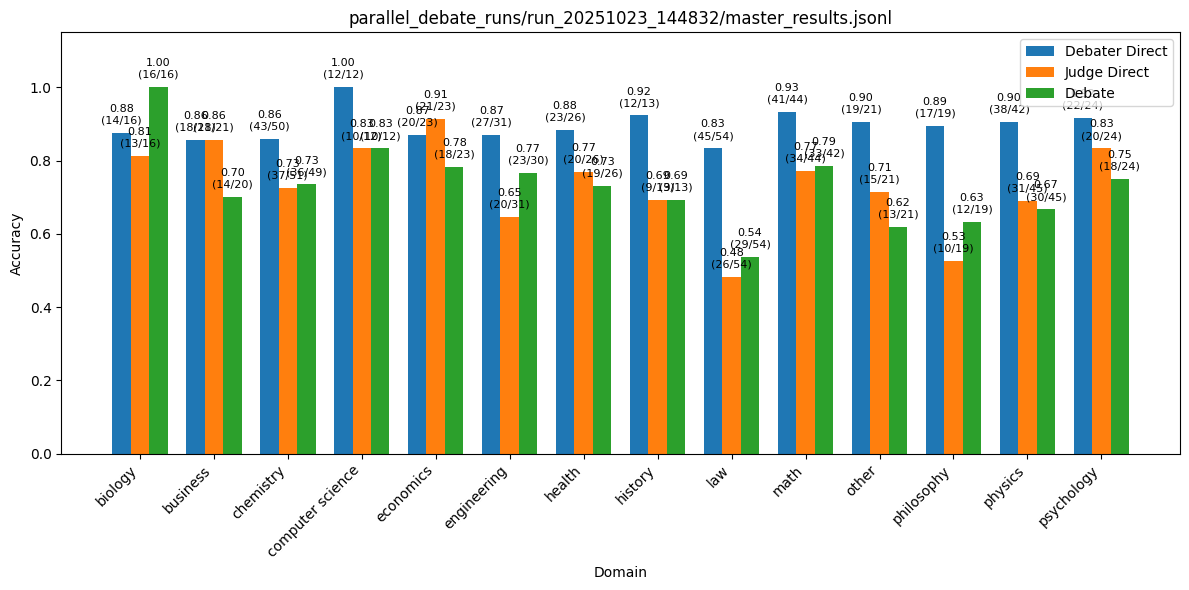

In [633]:
### Let's look at performance by domain
from datasets import load_dataset

# dataset = load_dataset("Idavidrein/gpqa", "gpqa_diamond", split="train")
# # dataset = load_dataset("Idavidrein/gpqa", "gpqa_main", split="train")
dataset_df = pd.DataFrame(dataset)

dataset = load_dataset("TIGER-Lab/MMLU-Pro", None, split="test")

# domain_field = 'High-level domain'
# domain_field = 'Subdomain'
domain_field = 'category'
dataset_df['question_idx'] = dataset_df.index
merged_with_domain = results_df.merge(
    dataset_df[['question_idx', domain_field]],
    left_on='question.question_idx',
    right_on='question_idx',
    how='left'
)




domain_accuracies = {}
for domain in merged_with_domain[domain_field].dropna().unique():
    domain_data = merged_with_domain[merged_with_domain[domain_field] == domain]
    domain_accuracies[domain] = {
        'Debater Direct': {
            'accuracy': domain_data['debater_direct.correct'].mean(),
            'correct': domain_data['debater_direct.correct'].sum(),
            'total': domain_data['debater_direct.correct'].count()
        },
        'Judge Direct': {
            'accuracy': domain_data['judge_direct.correct'].mean(),
            'correct': domain_data['judge_direct.correct'].sum(),
            'total': domain_data['judge_direct.correct'].count()
        },
        'Debate': {
            'accuracy': domain_data[f'{mode_prefix}.correct'].mean(),
            'correct': domain_data[f'{mode_prefix}.correct'].sum(),
            'total': domain_data[f'{mode_prefix}.correct'].count()
        }
    }

domains = sorted(domain_accuracies.keys())
conditions = ['Debater Direct', 'Judge Direct', 'Debate']
x = np.arange(len(domains))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
for i, condition in enumerate(conditions):
    values = [domain_accuracies[domain][condition]['accuracy'] for domain in domains]
    bars = ax.bar(x + i * width, values, width, label=condition, color=plt.cm.tab10.colors[i])
    
    for j, (bar, domain) in enumerate(zip(bars, domains)):
        stats = domain_accuracies[domain][condition]
        accuracy = stats['accuracy']
        correct = int(stats['correct'])
        total = int(stats['total'])
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{accuracy:.2f}\n({correct}/{total})',
                ha='center', va='bottom', fontsize=8)


ax.set_ylabel('Accuracy')
ax.set_xlabel('Domain')
ax.set_title(results_file)
ax.set_xticks(x + width)
ax.set_xticklabels(domains, rotation=45, ha='right')
ax.set_ylim(0, 1.15)
ax.legend()

plt.tight_layout()
plt.show()

/var/folders/9l/xmd1jn1s1gg47vfyv_n8g3xh0000gn/T/ipykernel_28147/546979342.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(x, y, s=sizes, alpha=0.6, c=plt.cm.tab10.colors[0])


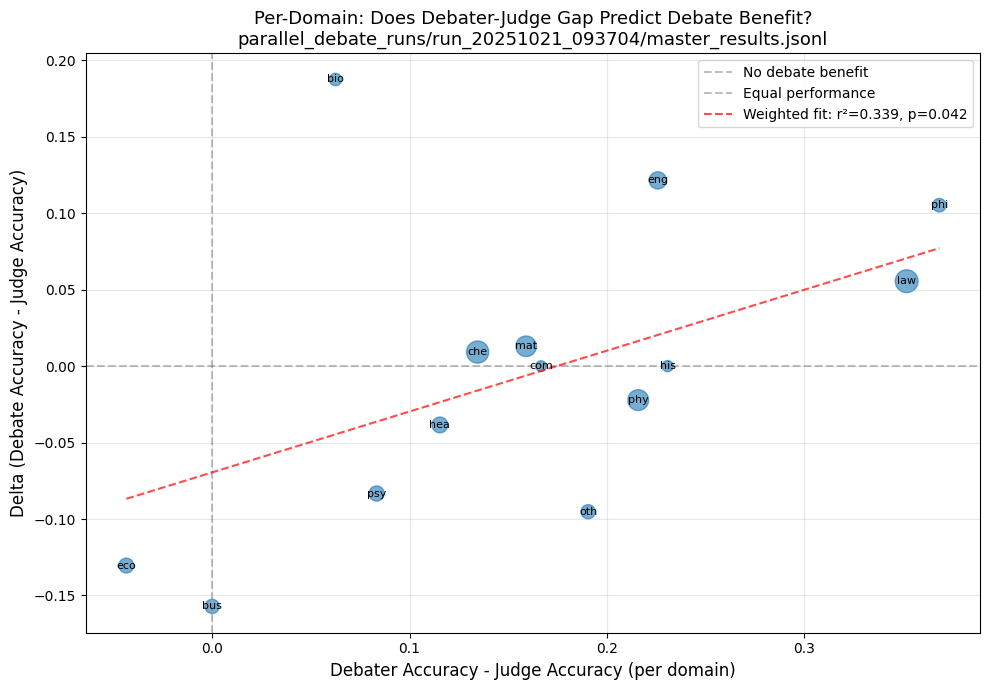


Domain Analysis:
              domain  debater_judge_diff     delta  count
13        philosophy            0.368421  0.105263     19
3                law            0.351852  0.055556     54
9            history            0.230769  0.000000     13
2        engineering            0.225806  0.121505     31
12           physics            0.215873 -0.022222     45
5              other            0.190476 -0.095238     21
10  computer science            0.166667  0.000000     12
0               math            0.159091  0.012987     44
6          chemistry            0.134510  0.009204     51
4             health            0.115385 -0.038462     26
1         psychology            0.083333 -0.083333     24
8            biology            0.062500  0.187500     16
11          business            0.000000 -0.157143     21
7          economics           -0.043478 -0.130435     23


In [637]:
# Make a plot of the delta of debate accuracy vs judge accuracy as a function of debater vs judge accuracy difference. 
# The hypothesis is that the larger the difference, the larger the delta.
# Analysis per domain

domain_analysis = []
for domain in merged_with_domain[domain_field].dropna().unique():
    domain_data = merged_with_domain[merged_with_domain[domain_field] == domain]
    
    debater_acc = domain_data['debater_direct.correct'].mean()
    judge_acc = domain_data['judge_direct.correct'].mean()
    debate_acc = domain_data[f'{mode_prefix}.correct'].mean()
    count = len(domain_data)
    
    debater_judge_diff = debater_acc - judge_acc
    delta = debate_acc - judge_acc
    
    domain_analysis.append({
        'domain': domain,
        'debater_acc': debater_acc,
        'judge_acc': judge_acc,
        'debate_acc': debate_acc,
        'debater_judge_diff': debater_judge_diff,
        'delta': delta,
        'count': count
    })

domain_df = pd.DataFrame(domain_analysis)

fig, ax = plt.subplots(figsize=(10, 7))
x = domain_df['debater_judge_diff'].values
y = domain_df['delta'].values
sizes = domain_df['count'].values * 5

scatter = ax.scatter(x, y, s=sizes, alpha=0.6, c=plt.cm.tab10.colors[0])

for _, row in domain_df.iterrows():
    ax.text(row['debater_judge_diff'], row['delta'], 
            f"{row['domain'][:3]}", 
            ha='center', va='center', fontsize=8)

ax.axhline(0, color='gray', linestyle='--', alpha=0.5, label='No debate benefit')
ax.axvline(0, color='gray', linestyle='--', alpha=0.5, label='Equal performance')

from scipy import stats
weights = domain_df['count'].values
slope_w, intercept_w = np.polyfit(x, y, 1, w=weights)
line_x = np.array([x.min(), x.max()])
line_y_w = slope_w * line_x + intercept_w

y_pred_w = slope_w * x + intercept_w
ss_res_w = np.sum(weights * (y - y_pred_w)**2)
ss_tot_w = np.sum(weights * (y - np.average(y, weights=weights))**2)
r2_w = 1 - (ss_res_w / ss_tot_w)

n = len(x)
dof = n - 2
mse_w = ss_res_w / dof
se_slope_w = np.sqrt(mse_w / np.sum(weights * (x - np.average(x, weights=weights))**2))
t_stat_w = slope_w / se_slope_w
p_value_w = 2 * (1 - stats.t.cdf(abs(t_stat_w), dof))

ax.plot(line_x, line_y_w, 'r--', alpha=0.7, label=f'Weighted fit: r²={r2_w:.3f}, p={p_value_w:.3f}')

ax.set_xlabel('Debater Accuracy - Judge Accuracy (per domain)', fontsize=12)
ax.set_ylabel('Delta (Debate Accuracy - Judge Accuracy)', fontsize=12)
ax.set_title(f'Per-Domain: Does Debater-Judge Gap Predict Debate Benefit?\n{results_file}', fontsize=13)
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print("\nDomain Analysis:")
print(domain_df.sort_values('debater_judge_diff', ascending=False)[['domain', 'debater_judge_diff', 'delta', 'count']]) 


In [535]:
merged_with_domain[['question.choice_values', 'Correct Answer']]

question.choice_values  \
0                                         [1,2, 1,2,4]   
1    [U=- (1/2) kq^2 d/(d^2 +R^2), U=- (1/2) *kq^2 ...   
2                                             [0, 4 π]   
3    [+\varepsilon \hbar/2, - \varepsilon \hbar/2, ...   
4    [A = trimethyl 2-(p-tolyl)propane-1,1,3-tricar...   
..                                                 ...   
193  [A = 2-methyl-1-phenylbutan-1-one, B = 2-(4-hy...   
194  [3,4-dimethylcyclohexan-1-one, 2,2,3,4-tetrame...   
195  [methyl (2E,8E,10E)-tetradeca-2,8,10-trienoate...   
196  [3,4-dimethyl-5,6-dioxooctanal, 3,4-dimethyl-5...   
197                                            [4, 10]   

                                        Correct Answer  
0                                                1,2,4  
1                         U=- (1/2) *kq^2 R/(d^2 -R^2)  
2                                                  4 π  
3                        + \varepsilon, -\varepsilon\n  
4    A = trimethyl 2-(p-tolyl)propane-1,1,3-tricarb...  
..                                                 ...  
193  A = 3-ethyl-3-phenylpentan-2-one, B = 3-(4-hyd...  
194                       3,4-dimethylcyclohexan-1-one  
195      methyl (2E,8E,10E)-tetradeca-2,8,10-trienoate  
196                3,4-dimethyl-5,6-dioxooctanoic acid  
197                                                  4  

[198 rows x 2 columns]

### Cross-experiment comparison

In [634]:
# Cross-experiment comparison
import matplotlib.pyplot as plt

runs = [
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debater_direct', 'judge_direct']),
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_074342/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_080557/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_091635/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_093704/master_results.jsonl', ['debate']),
]

accuracies_list = []
labels_list = []

for results_file, conditions in runs:
    df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
    
    for condition in conditions:
        if condition == 'debate':
            if 'modes.non_interactive.correct' in df.columns:
                col_name = 'modes.non_interactive.correct'
            else:
                col_name = 'modes.interactive.correct'
        else:
            col_name = f'{condition}.correct'
        
        if col_name in df.columns:
            accuracy = df[col_name].mean()
            count = df[col_name].count()
            accuracies_list.append((accuracy, count))
            
            run_id = results_file.split('_')[-2]
            labels_list.append(f"{run_id}_{condition}")

# Custom x-axis labels (one per bar)
custom_labels = ['debater qa', 'judge qa', 'debate baseline', '2 turns max', '1 turn max', 'simultaneous (1 "turn")', 'interactive']
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = range(len(accuracies_list))
accuracies = [a[0] for a in accuracies_list]
counts = [a[1] for a in accuracies_list]
bars = ax.bar(x_pos, accuracies, color=plt.cm.tab10.colors[:len(accuracies_list)])
ax.set_xticks(x_pos)
ax.set_xticklabels(custom_labels, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.set_title('Accuracy Comparison Across Experiments')

for bar, acc, count in zip(bars, accuracies, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{acc:.2f}\n(n={int(count)})',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Why does gpt-4o-mini succeed where gpt-3.5-turbo fails?

In [365]:
# gpt_4o_results_file = 'parallel_debate_runs/run_20251022_134354/master_results.jsonl'
# gpt_35_results_file = 'parallel_debate_runs/run_20251022_134546/master_results.jsonl'

gpt_4o_results_file = 'parallel_debate_runs/run_20251022_205418/master_results.jsonl'
gpt_35_results_file = 'parallel_debate_runs/run_20251022_205835/master_results.jsonl'

gpt_4o_mini_results = pd.json_normalize(pd.read_json(gpt_4o_results_file, lines=True).to_dict('records'))
gpt_3_5_turbo_results = pd.json_normalize(pd.read_json(gpt_35_results_file, lines=True).to_dict('records'))

# merge the results
merged = pd.merge(
    gpt_4o_mini_results, 
    gpt_3_5_turbo_results, 
    on='question.question_idx', 
    suffixes=('_4o', '_3.5')
)

In [367]:
judge_cols = ['judge_direct.correct_4o', 'judge_direct.correct_3.5']
mode_cols = ['modes.non_interactive.correct_4o', 'modes.non_interactive.correct_3.5']

for judge_state, group in merged.groupby(judge_cols):
    print(f"\n4o: {judge_state[0]}, 3.5: {judge_state[1]}")
    print(group[mode_cols].value_counts())


4o: False, 3.5: False
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              True                                 26
                                  False                                16
False                             False                                 9
                                  True                                  7
Name: count, dtype: int64

4o: False, 3.5: True
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              True                                 8
                                  False                                7
False                             False                                3
                                  True                                 1
Name: count, dtype: int64

4o: True, 3.5: False
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              False                                21
               

In [368]:
merged_no_nan = merged.dropna()
data_4o = merged_no_nan[['debater_direct.correct_4o', 'judge_direct.correct_4o', f'{mode_prefix}.correct_4o']].astype(float).values
data_35 = merged_no_nan[['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']].astype(float).values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, max(6, len(data_4o) * 0.08)), sharey=True)

for ax, data, title in [(ax1, data_4o, 'GPT-4o-mini'), (ax2, data_35, 'GPT-3.5-turbo')]:
    ax.imshow(data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1, interpolation='nearest')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Debater QA', 'Judge QA', 'Debate'])
    ax.set_title(title)
    # for i in range(len(data) + 1):
    #     ax.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)

ax1.set_yticks(range(len(merged_no_nan)))
ax1.set_yticklabels(merged_no_nan['question.question_idx'].values, fontsize=5)
ax1.set_ylabel('Question Index')

plt.tight_layout()
plt.show()

In [372]:
# Get breakdown of what 3.5 did conditional on 4o going C-I-C (correct, incorrect, correct)
mask_4o_cic = (
    (merged['debater_direct.correct_4o'] == True) & 
    (merged['judge_direct.correct_4o'] == False) & 
    (merged[f'{mode_prefix}.correct_4o'] == True)
)

filtered_35 = merged[mask_4o_cic][['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']]

patterns = filtered_35.apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()
pattern_ratios = patterns / patterns.sum()

print(f"When GPT-4o-mini goes C-I-C (n={mask_4o_cic.sum()}):")
print("\nGPT-3.5-turbo patterns:")
for pattern, ratio in pattern_ratios.items():
    labels = ['C' if x else 'I' for x in pattern]
    print(f"  {'-'.join(labels)}: {ratio:.3f}")
print(f"\nSum: {pattern_ratios.sum():.3f}") 


When GPT-4o-mini goes C-I-C (n=47):

GPT-3.5-turbo patterns:
  C-I-C: 0.447
  C-I-I: 0.277
  C-C-C: 0.170
  C-C-I: 0.106

Sum: 1.000


In [381]:
# What is the overall distribution of outcomes for 3.5 (C-I-C, C-I-I, C-C-C, C-C-I) where debater is correct.
# Get overall distribution of outcomes for both models where debater is correct

# patterns_4o = merged[
#     ['debater_direct.correct_4o', 'judge_direct.correct_4o', f'{mode_prefix}.correct_4o']
# ].apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()
patterns_4o = merged[merged['debater_direct.correct_4o'] == True][
    ['debater_direct.correct_4o', 'judge_direct.correct_4o', f'{mode_prefix}.correct_4o']
].apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()

pattern_ratios_4o = patterns_4o / patterns_4o.sum()

# Sort 4o patterns by frequency
sorted_patterns_4o = sorted(patterns_4o.items(), key=lambda x: x[1], reverse=True)
sorted_keys_4o = [pattern for pattern, _ in sorted_patterns_4o]

# Get 3.5 patterns where debater is correct
# patterns_35 = merged[
#     ['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']
# ].apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()
patterns_35 = merged[merged['debater_direct.correct_3.5'] == True][
    ['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']
].apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()

pattern_ratios_35 = patterns_35 / patterns_35.sum()

# Print 4o patterns sorted by frequency
for pattern, count in sorted_patterns_4o:
    labels = ['C' if x else 'I' for x in pattern]
    ratio = pattern_ratios_4o[pattern]
    print(f"  {'-'.join(labels)}: {ratio:.3f} (n={count})")
print(f"\nSum: {pattern_ratios_4o.sum():.3f}")

# Print 3.5 patterns in the same order as 4o
for pattern in sorted_keys_4o:
    if pattern in patterns_35:
        labels = ['C' if x else 'I' for x in pattern]
        ratio = pattern_ratios_35[pattern]
        count = patterns_35[pattern]
        print(f"  {'-'.join(labels)}: {ratio:.3f} (n={count})")
    else:
        labels = ['C' if x else 'I' for x in pattern]
        print(f"  {'-'.join(labels)}: 0.000 (n=0)")
print(f"\nSum: {pattern_ratios_35.sum():.3f}")



  C-C-C: 0.545 (n=85)
  C-I-C: 0.301 (n=47)
  C-C-I: 0.077 (n=12)
  C-I-I: 0.077 (n=12)

Sum: 1.000
  C-C-C: 0.277 (n=44)
  C-I-C: 0.252 (n=40)
  C-C-I: 0.220 (n=35)
  C-I-I: 0.252 (n=40)

Sum: 1.000


In [378]:
merged['judge_direct.correct_4o'].value_counts(normalize=True)

judge_direct.correct_4o
True     0.606061
False    0.393939
Name: proportion, dtype: float64

In [406]:
# Of C-I-C, what % of these are correct is A vs B
seq_mask = (
    (merged['debater_direct.correct_4o'] == True) & 
    (merged['judge_direct.correct_4o'] == True) & 
    (merged[f'{mode_prefix}.correct_4o'] == True)
)

merged[seq_mask]['question.is_correct_4o'].value_counts(normalize=False)

question.is_correct_4o
[True, False]    45
[False, True]    39
Name: count, dtype: int64

In [410]:

merged[f'{mode_prefix}.winner_3.5'].value_counts(normalize=True)

modes.non_interactive.winner_3.5
B    0.554404
A    0.445596
Name: proportion, dtype: float64